# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [26]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

**Preprocesamiento básico y construcción de TF**

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(stop_words='english')

tf_matrix = tf_vectorizer.fit_transform(newsgroupsdocs)

terms = tf_vectorizer.get_feature_names_out()

tf_matrix.shape

(18846, 134101)

**Convertir TF a DataFrame para inspección**

In [35]:
import pandas as pd

tf_df = pd.DataFrame(tf_matrix.toarray(), columns=terms)

tf_df.head()

,00,000,0000,00000,000000,00000000,0000000004,00000000b,00000001,00000001b,...,zzs,zzvsi,zzy_3w,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé,ÿhooked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Cálculo de DF**

In [7]:
import numpy as np

df = np.sum(tf_matrix > 0, axis=0).A1  

df_df = pd.DataFrame({
    "term": terms,
    "df": df
})

df_df.sort_values("df", ascending=False).head(20)

,term,df
74923,like,4212
69968,just,4081
46080,don,3894
72097,know,3799
116811,think,3144
93364,people,2988
45979,does,2988
117263,time,2949
122267,use,2705
58058,good,2558


**Cálculo de IDF manual y visualización**

In [8]:
N = tf_matrix.shape[0]
idf = np.log(N / (df + 1))   

idf_df = pd.DataFrame({
    "term": terms,
    "df": df,
    "idf": idf
})

idf_df.sort_values("idf", ascending=False).head(20)

,term,df,idf
134100,ÿhooked,1,9.150909
76096,lr6jp3o,1,9.150909
76118,lrr,1,9.150909
76117,lrq1xs,1,9.150909
76116,lrpl,1,9.150909
76115,lrp,1,9.150909
76114,lrlq0l,1,9.150909
76113,lrk,1,9.150909
76112,lrj,1,9.150909
76111,lri,1,9.150909


**TF-IDF con sklearn**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroupsdocs)

tfidf_terms = tfidf_vectorizer.get_feature_names_out()

tfidf_matrix.shape

(18846, 134101)

## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

**Definir consulta y vector TF-IDF de la consulta**

In [10]:
query = "computer software"

query_vec = tfidf_vectorizer.transform([query])

query_vec.shape

(1, 134101)

**Calcular similitud coseno y ranking**

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(query_vec, tfidf_matrix).flatten()

ranking_indices = cos_sim.argsort()[::-1]

cos_sim[ranking_indices[:10]]

array([0.53389086, 0.40782059, 0.40313307, 0.37325576, 0.34000243,
       0.30248957, 0.30083361, 0.30059671, 0.29808904, 0.27992883])

**Tabla con ranking de documentos (Top-K)**

In [12]:
top_k = 10  

top_docs = []
for idx in ranking_indices[:top_k]:
    top_docs.append({
        "doc_id": idx,
        "similarity": cos_sim[idx],
        "snippet": newsgroupsdocs[idx][:300].replace("\n", " ")
    })

ranking_df = pd.DataFrame(top_docs)
ranking_df

,doc_id,similarity,snippet
0,7729,0.533891,** For my computer law module I have been aske...
1,5751,0.407821,Nick Haines sez; >(given that I've hear...
2,15741,0.403133,"Hello, I am searching for rendering softw..."
3,190,0.373256,Sorry to waste the bandwidth. Does anyone know...
4,2788,0.340002,\tWhere can I buy or build a device that will...
5,12168,0.302490,"Hi there, I am here looking for some help. M..."
6,7566,0.300834,Within the next several months I'll be looking...
7,16286,0.300597,Computers are a special case.. and it's a pr...
8,5635,0.298089,"A professor of mine once said ""The difference..."
9,15511,0.279929,Unfortunately there a *LOT* of such software...


## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

**Preparar las variables para BM25**

In [13]:
# Parámetros estándar de BM25
k1 = 1.5
b = 0.75

doc_len = tf_matrix.sum(axis=1).A1
avgdl = doc_len.mean()

N = tf_matrix.shape[0]

df_bm25 = (tf_matrix > 0).sum(axis=0).A1

idf_bm25 = np.log((N - df_bm25 + 0.5) / (df_bm25 + 0.5) + 1)

vocab = tf_vectorizer.vocabulary_

N, avgdl

(18846, 101.58845378329619)

**Función para calcular BM25 para una consulta**

In [17]:
analyzer = tf_vectorizer.build_analyzer()

def bm25_scores_for_query(query_text):
    tokens = analyzer(query_text)
    scores = np.zeros(N)

    for term in tokens:
        if term in vocab:
            j = vocab[term]

            tf_col = tf_matrix[:, j].toarray().ravel()

            idf = idf_bm25[j]

            denom = tf_col + k1 * (1 - b + b * doc_len / avgdl)
            num = tf_col * (k1 + 1)

            scores += idf * (num / denom)

    return scores

bm25_scores = bm25_scores_for_query(query)
bm25_scores[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Ranking de documentos con BM25 (Top-K)**

In [18]:
bm25_ranking_indices = bm25_scores.argsort()[::-1]

top_k = 10 

bm25_top_docs = []
for idx in bm25_ranking_indices[:top_k]:
    bm25_top_docs.append({
        "doc_id": idx,
        "bm25_score": bm25_scores[idx],
        "snippet": newsgroupsdocs[idx][:300].replace("\n", " ")
    })

bm25_ranking_df = pd.DataFrame(bm25_top_docs)
bm25_ranking_df

,doc_id,bm25_score,snippet
0,7729,12.774786,** For my computer law module I have been aske...
1,15741,11.380704,"Hello, I am searching for rendering softw..."
2,7566,11.145677,Within the next several months I'll be looking...
3,190,10.871626,Sorry to waste the bandwidth. Does anyone know...
4,2788,10.849231,\tWhere can I buy or build a device that will...
5,3730,10.778072,I don't think so. The assumption is there. ...
6,5635,10.739590,"A professor of mine once said ""The difference..."
7,13091,10.420006,My friends and I have a buch of books for sale...
8,5627,10.343469,"Or perhaps you write a freely available, GPLe..."
9,13373,10.054028,I think a few things are being missed overall ...


**Comparar TF-IDF vs BM25 (manual/visual)**

In [19]:
top_k = 10  

tfidf_top = ranking_indices[:top_k]
bm25_top = bm25_ranking_indices[:top_k]

comparison_rows = []
for i in range(top_k):
    comparison_rows.append({
        "rank": i + 1,
        "tfidf_doc_id": tfidf_top[i],
        "bm25_doc_id": bm25_top[i],
        "same_doc": tfidf_top[i] == bm25_top[i]
    })

comparison_df = pd.DataFrame(comparison_rows)
comparison_df

,rank,tfidf_doc_id,bm25_doc_id,same_doc
0,1,7729,7729,True
1,2,5751,15741,False
2,3,15741,7566,False
3,4,190,190,True
4,5,2788,2788,True
5,6,12168,3730,False
6,7,7566,5635,False
7,8,16286,13091,False
8,9,5635,5627,False
9,10,15511,13373,False


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

**Preparar los scores comparables (TF-IDF vs BM25)**

In [20]:
import matplotlib.pyplot as plt

top_k = 10

tfidf_top_indices = ranking_indices[:top_k]
tfidf_top_scores = cos_sim[tfidf_top_indices]

bm25_scores_for_tfidf_top = bm25_scores[tfidf_top_indices]

comparison_scores = pd.DataFrame({
    "doc_id": tfidf_top_indices,
    "tfidf_score": tfidf_top_scores,
    "bm25_score": bm25_scores_for_tfidf_top
})

comparison_scores

,doc_id,tfidf_score,bm25_score
0,7729,0.533891,12.774786
1,5751,0.407821,7.062628
2,15741,0.403133,11.380704
3,190,0.373256,10.871626
4,2788,0.340002,10.849231
5,12168,0.302490,6.567920
6,7566,0.300834,11.145677
7,16286,0.300597,6.680929
8,5635,0.298089,10.739590
9,15511,0.279929,6.577294


**Gráfico de barras comparando TF-IDF y BM25**

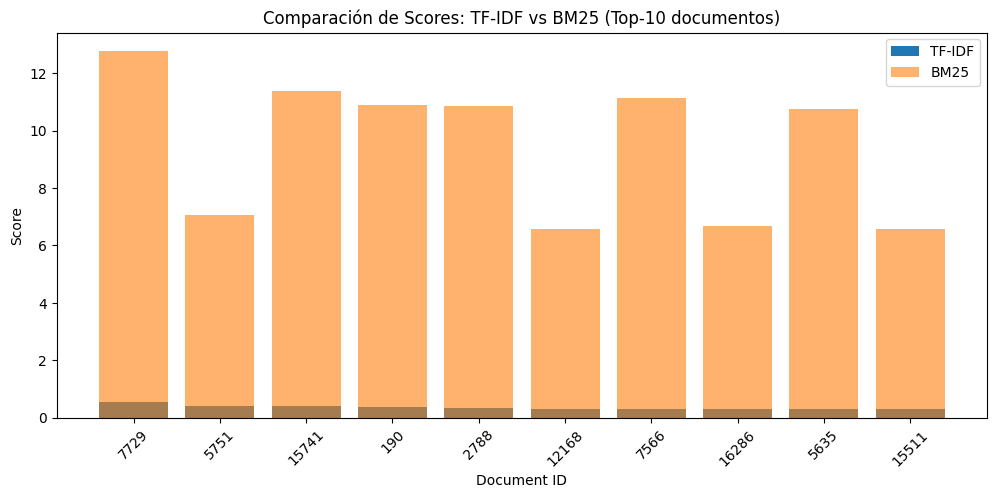

In [21]:
plt.figure(figsize=(12, 5))

x = range(top_k)

plt.bar(x, comparison_scores["tfidf_score"], label="TF-IDF")
plt.bar(x, comparison_scores["bm25_score"], alpha=0.6, label="BM25")

plt.xticks(x, comparison_scores["doc_id"], rotation=45)
plt.xlabel("Document ID")
plt.ylabel("Score")
plt.title("Comparación de Scores: TF-IDF vs BM25 (Top-10 documentos)")
plt.legend()

plt.show()

**Gráfico separado para ver diferencias más claramente**

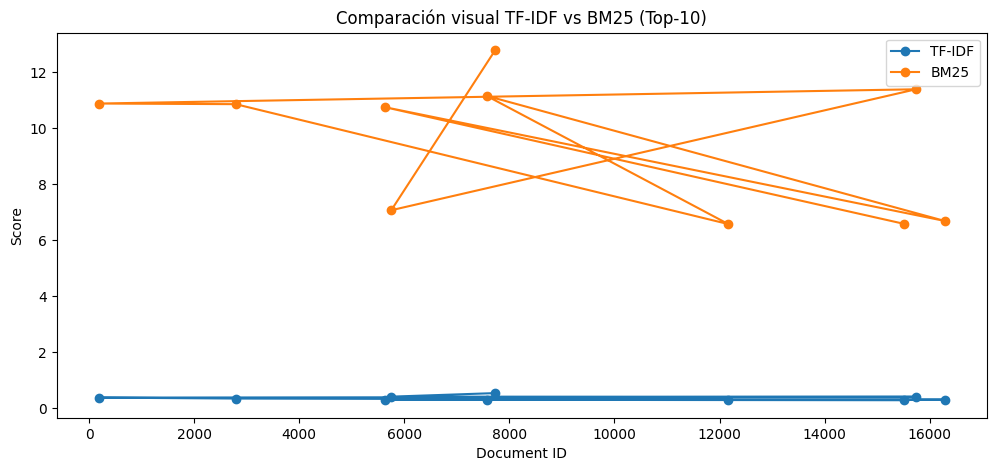

In [22]:
plt.figure(figsize=(12, 5))

plt.plot(comparison_scores["doc_id"], comparison_scores["tfidf_score"], marker="o", label="TF-IDF")
plt.plot(comparison_scores["doc_id"], comparison_scores["bm25_score"], marker="o", label="BM25")

plt.xlabel("Document ID")
plt.ylabel("Score")
plt.title("Comparación visual TF-IDF vs BM25 (Top-10)")
plt.legend()

plt.show()

## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [37]:
def buscar_tf_idf(query, top_k=10):
    q_vec = tfidf_vectorizer.transform([query])
    sims = cosine_similarity(q_vec, tfidf_matrix).flatten()
    idxs = sims.argsort()[::-1]
    
    resultados = []
    for i in idxs[:top_k]:
        resultados.append({
            "doc_id": i,
            "similarity": sims[i],
            "snippet": newsgroupsdocs[i][:300].replace("\n", " ")
        })
    
    return pd.DataFrame(resultados)

buscar_tf_idf("computer software", top_k=20)

,doc_id,similarity,snippet
0,7729,0.533891,** For my computer law module I have been aske...
1,5751,0.407821,Nick Haines sez; >(given that I've hear...
2,15741,0.403133,"Hello, I am searching for rendering softw..."
3,190,0.373256,Sorry to waste the bandwidth. Does anyone know...
4,2788,0.340002,\tWhere can I buy or build a device that will...
5,12168,0.302490,"Hi there, I am here looking for some help. M..."
6,7566,0.300834,Within the next several months I'll be looking...
7,16286,0.300597,Computers are a special case.. and it's a pr...
8,5635,0.298089,"A professor of mine once said ""The difference..."
9,15511,0.279929,Unfortunately there a *LOT* of such software...


**Definir consulta y documentos relevantes (ground truth)**

In [30]:
query_eval = "computer software"

relevantes = {7729, 5751, 15741, 190, 2788}

relevantes

{190, 2788, 5751, 7729, 15741}

**Obtener rankings de TF-IDF y BM25**

In [31]:
q_vec = tfidf_vectorizer.transform([query_eval])
sim_eval = cosine_similarity(q_vec, tfidf_matrix).flatten()
tfidf_rank_eval = sim_eval.argsort()[::-1]

bm25_eval = bm25_scores_for_query(query_eval)
bm25_rank_eval = bm25_eval.argsort()[::-1]

tfidf_rank_eval[:10], bm25_rank_eval[:10]

(array([ 7729,  5751, 15741,   190,  2788, 12168,  7566, 16286,  5635,
        15511]),
 array([ 7729, 15741,  7566,   190,  2788,  3730,  5635, 13091,  5627,
        13373]))

**Precision@3 para TF-IDF y BM25**

In [32]:
def precision_at_k(ranking, relevantes, k=3):
    top_k = ranking[:k]
    hits = sum(1 for doc in top_k if doc in relevantes)
    return hits / k

p3_tfidf = precision_at_k(tfidf_rank_eval, relevantes, k=3)
p3_bm25 = precision_at_k(bm25_rank_eval, relevantes, k=3)

p3_tfidf, p3_bm25

(1.0, 0.6666666666666666)

**MAP para TF-IDF y BM25**

In [33]:
def average_precision(ranking, relevantes):
    score = 0.0
    hit_count = 0
    
    for i, doc in enumerate(ranking):
        if doc in relevantes:
            hit_count += 1
            score += hit_count / (i + 1)
            
    if hit_count == 0:
        return 0.0
    
    return score / hit_count

map_tfidf = average_precision(tfidf_rank_eval, relevantes)
map_bm25 = average_precision(bm25_rank_eval, relevantes)

map_tfidf, map_bm25

(1.0, 0.7244927536231883)

**Resumen de evaluación**

In [34]:
pd.DataFrame({
    "Modelo": ["TF-IDF", "BM25"],
    "Precision@3": [p3_tfidf, p3_bm25],
    "MAP": [map_tfidf, map_bm25]
})

,Modelo,Precision@3,MAP
0,TF-IDF,1.000000,1.000000
1,BM25,0.666667,0.724493
